In [54]:
drivers = """Zwinmen;FurryAMAL;Ken;SunHongwei
Grazie Sebastian;KazamiKazuki;zls233:Vanilla;mushimu
RaidenSan:SpeedPug;JasonSi;seng;Tin;Edwinlaw
Whale Fall;elkova;afireinthesky;Arthur329;YuLei
MAJ;DaLianMao;Benjamin;F:5Q
sunny&kiki;ATEN;DAVID;anthony"""

numbers = """#77
#114
#853
#95
#219
#88"""

In [55]:
drivers = drivers.replace(':', ';').lower()

In [58]:
records = dict()

In [60]:
def insert_records(filename):
    with open(filename, 'r') as f:
        raw_html = f.read()
    for row in raw_html.split('clickableRow')[1:]:
        eles = row.split('td')
        driver = eles[3].split('>')[1].split('<')[0]
        laptime = eles[7].split('>')[1].split('<')[0]
        print(driver, laptime)
        records[driver.lower()] = laptime

In [61]:
insert_records('practice.html')
insert_records('laptime.html')

Edwinlaw 08:33.599
Franky 08:36.186
Tin 08:37.947
Henry 08:37.995
Zwinmen 08:38.941
SpeedPug 08:39.403
Jason Si 08:40.365
Grazie_Sebastian 08:42.732
KazamiKazuki 08:44.845
ELKOVA 08:46.047
seng 08:46.214
ken 08:49.425
DaLianMao 08:51.449
SunHongwei 08:52.206
DaftHuman 08:52.806
afireinthesky 08:53.201
RaidenSan 08:55.897
让我看看是谁在鱼雷 08:59.167
ATEN 09:06.298
SUGOracing 09:52.681
YuLei 08:29.612
Edwinlaw 08:31.805
zls233 08:32.509
Grazie_Sebastian 08:33.017
mushimu 08:36.793
JasonSi 08:39.115
Vanilla 08:39.143
ELKOVA 08:39.777
SpeedPug 08:40.149
Zwinmen 08:42.183
ken 08:45.134
KazamiKazuki 08:45.325
Whale Fall 08:47.360
SunHongwei 08:50.353
afireinthesky 08:50.512
topclub-05 08:50.840
seng 08:51.856
ATEN 08:52.667
RaidenSan 08:54.197
ATEN 08:59.033


In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def parse_time(t):
    minutes = int(t[0:2])
    seconds = int(t[3:5])
    mill = int(t[-3:])
    return minutes * 60 + seconds + mill * 1e-3

In [30]:
parse_time(records['yulei'])

497.748

(500.0, 550.0)

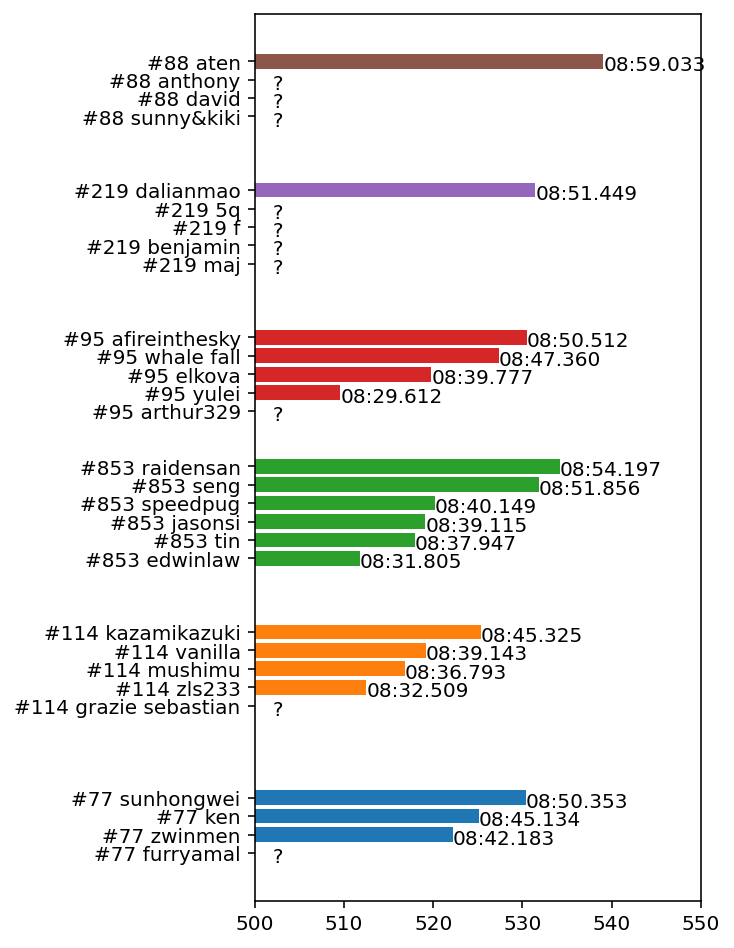

In [62]:
fig, ax = plt.subplots()
fig.set_dpi(144)
fig.set_size_inches(4, 8)

basex = 0
ys = []
yticks = []

for n, ds in zip(numbers.split('\n'), drivers.split('\n')):
    team = []
    for d in ds.split(';'):
        if d.lower() in records:
            t = records[d.lower()]
        else:
            t = '07:30.000'
        team.append((f'{n} {d}', t))
    team = sorted(team, key=lambda d: parse_time(d[1]))
    y = np.arange(len(team)) + basex
    ax.barh(y, [parse_time(d[1]) for d in team])
    for i, (n, t) in enumerate(team):
        if t == '07:30.000':
            ax.text(502, basex + i - .5, '?')
        else:
            ax.text(parse_time(t), basex + i - .5, t)
    ys += y.tolist()
    yticks += [d[0] for d in team]
    basex += 8

ax.set_yticks(ys)
ax.set_yticklabels(yticks)
ax.set_xlim(500, 550)